<a href="https://colab.research.google.com/github/drskprabhakar/Axial-Length-Prediction-ML-Regression-mode/blob/main/Glaucoma_log_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_excel('/content/drive/MyDrive/glaucoma dataset.xlsx')

In [5]:
df.shape

(27, 2)

In [6]:
df.columns

Index(['age', 'glaucoma'], dtype='object')

In [7]:
df.head()

,age,glaucoma
0,22,0
1,25,0
2,47,1
3,52,0
4,46,1


In [8]:
df.tail()

,age,glaucoma
22,40,1
23,45,1
24,50,1
25,54,1
26,23,0


In [9]:
df.corr()

,age,glaucoma
age,1.000000,0.732395
glaucoma,0.732395,1.000000


In [10]:
x = df.drop(['glaucoma'], axis=1).values
y = df['glaucoma'].values

<Axes: >

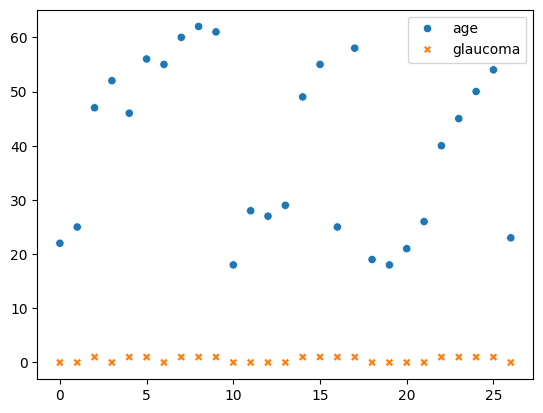

In [13]:
import seaborn as sns
sns.scatterplot(df)

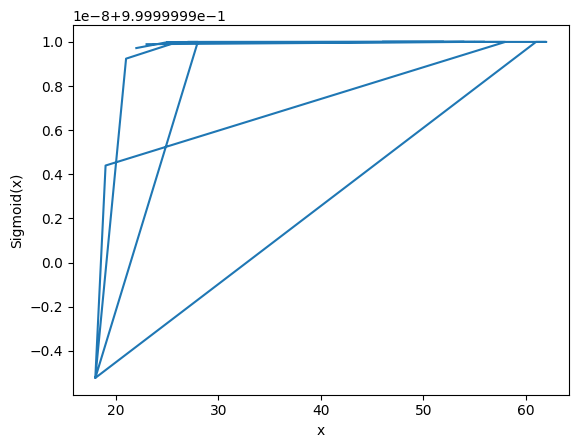

In [15]:
import matplotlib.pyplot as plt
z = 1/(1 + np.exp(-x))

plt.plot(x, z)
plt.xlabel("x")
plt.ylabel("Sigmoid(x)")
plt.show()

<Axes: >

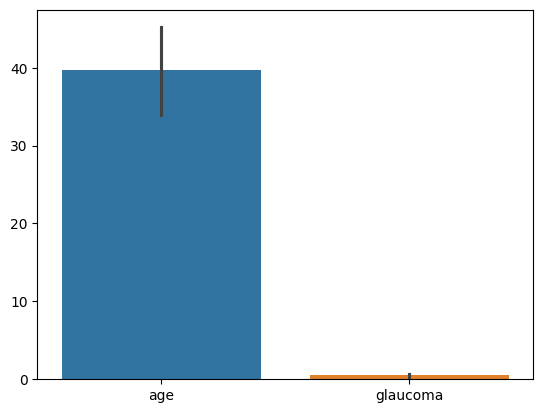

In [17]:
sns.barplot(df)

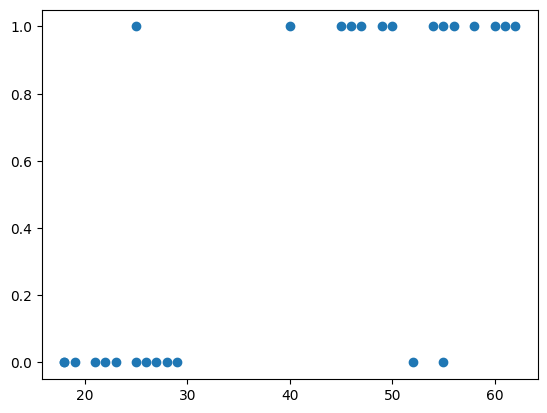

In [18]:
plt.scatter(x,y)

<Axes: >

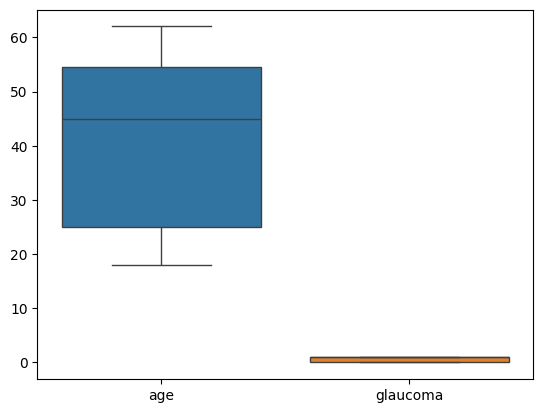

In [19]:
sns.boxplot(df)

<Axes: >

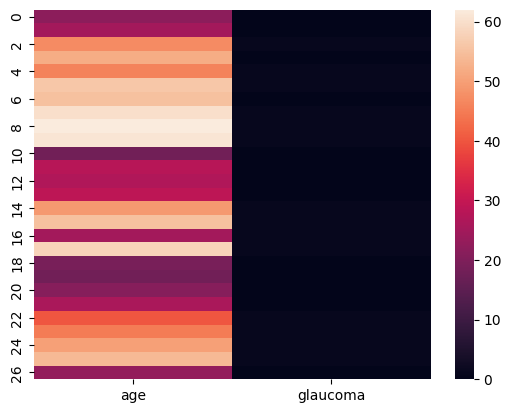

In [20]:
sns.heatmap(df)

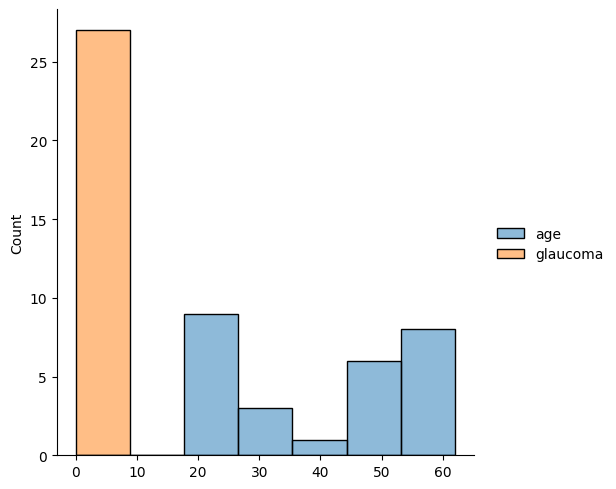

In [21]:
sns.displot(df)

<Axes: ylabel='Count'>

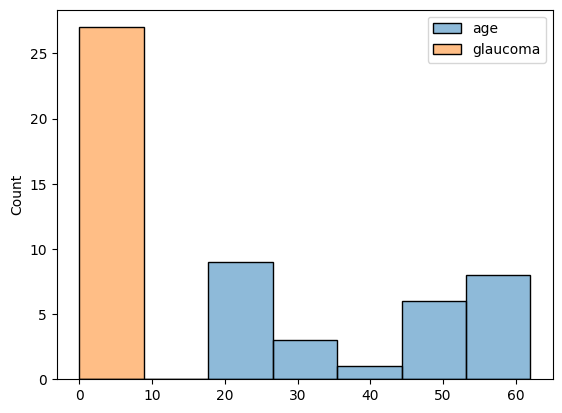

In [22]:
sns.histplot(df)

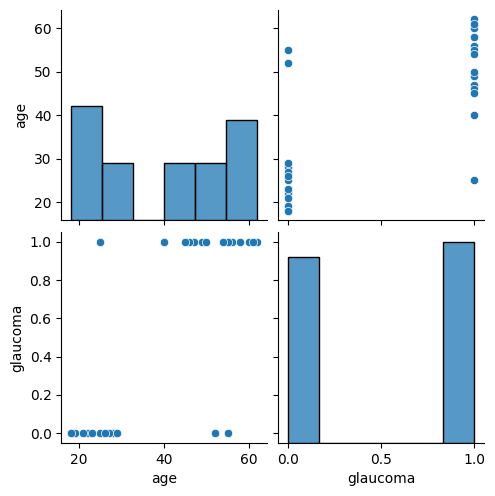

In [23]:
sns.pairplot(df)

In [36]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3, random_state=0)




In [37]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(x_train, y_train)

LogisticRegression()

In [38]:
y_predlinear = model.predict(x_test)
model.score(x_test, y_test)

1.0

In [39]:
model.predict_proba(x_test)

array([[0.36795916, 0.63204084],
       [0.3003633 , 0.6996367 ],
       [0.32212141, 0.67787859],
       [0.16005769, 0.83994231],
       [0.18927295, 0.81072705],
       [0.80028318, 0.19971682],
       [0.41631374, 0.58368626],
       [0.78356036, 0.21643964],
       [0.91708265, 0.08291735]])

In [40]:
x_test

array([[47],
       [50],
       [49],
       [58],
       [56],
       [28],
       [45],
       [29],
       [18]])

In [41]:
from sklearn.metrics import confusion_matrix, classification_report
confusion_matrix(y_test, y_predlinear)

array([[3, 0],
       [0, 6]])

<Axes: >

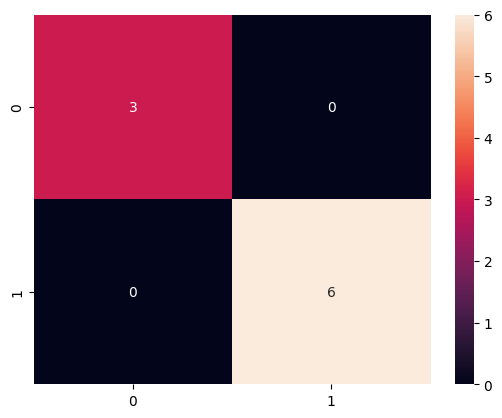

In [42]:
cf_matrix = confusion_matrix(y_test, y_predlinear)
sns.heatmap(cf_matrix, annot=True)

In [43]:
print(classification_report(y_test, y_predlinear))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         3
           1       1.00      1.00      1.00         6

    accuracy                           1.00         9
   macro avg       1.00      1.00      1.00         9
weighted avg       1.00      1.00      1.00         9



In [44]:
model.predict([[34]])

array([0])

In [57]:
model.predict([[42]])

array([1])